# 第五章　換気設備 / Chapter 5 Ventilation System

In [1]:
import numpy as np

# 試算例

### 初期条件

In [2]:
def get_default_ventilation():
    A_A = 120.08
    V = {'type' : 'ダクト式第二種換気設備又はダクト式第三種換気設備',
        'input' : '評価しない',
        'N' : 0.5}
    HEX = None
    
    return A_A, V, HEX

### 計算


In [3]:
def calc_results(A_A, V, HEX):

    from pyhees.section2_1_b import get_f_prim
    from pyhees.section5 import calc_E_E_V_d_t
    from pyhees.section2_1_c import get_n_p

    n_p = get_n_p(A_A)

    # 電気消費量
    E_E_V_d_t = calc_E_E_V_d_t(n_p, A_A, V, HEX)

    # 電気の一次エネルギー換算係数
    f_prim = get_f_prim()

    E_V_d_t = E_E_V_d_t * f_prim / 1000
    print(f'E_V_d_t = {np.sum(E_V_d_t)}MJ/a')
    
    return E_V_d_t

In [4]:
def get_each_graph(_E_V_d_t):

    import matplotlib.pyplot as plt

    _E_V_d = np.sum(_E_V_d_t.reshape(365,24), axis = 1)

    fig = plt.figure(figsize = (20,7))

    grh_day = fig.add_subplot(211)
    grh_day.set_ylabel('MJ/d')
    grh_day.set_xlabel('day')
    grh_day.plot(_E_V_d, label = "E_V")
    grh_day.legend()

    grh_date = fig.add_subplot(212)
    grh_date.set_ylabel('MJ/h')
    grh_date.set_xlabel('hour')
    grh_date.plot(_E_V_d_t.reshape(365,24)[334], label = "E_V:12/1")
    grh_date.plot(_E_V_d_t.reshape(365,24)[59], label = "E_V:3/1")
    grh_date.legend()

    plt.show()


### 計算条件1

初期条件での計算

In [5]:
A_A, V, HEX = get_default_ventilation()

E_V_d_t_1 = calc_results(A_A, V, HEX)

E_V_d_t = 5938.505695424001MJ/a


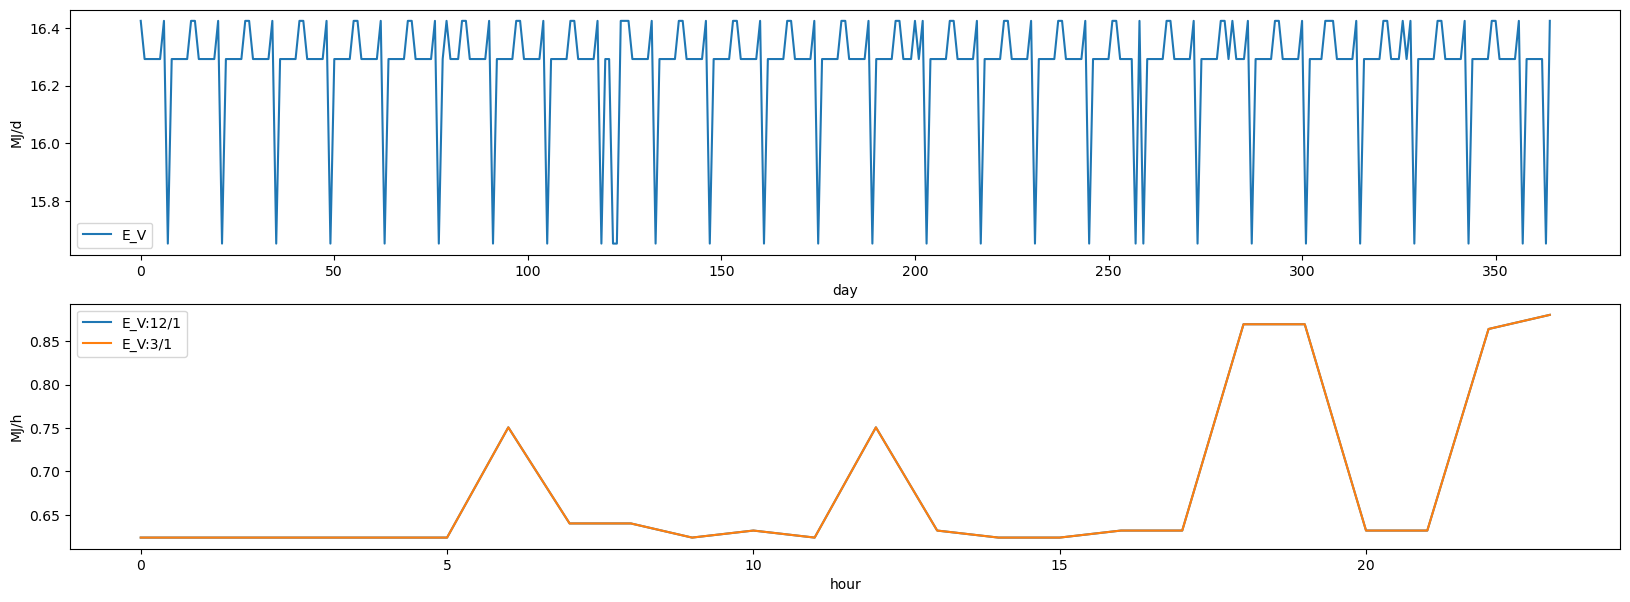

In [6]:
get_each_graph(E_V_d_t_1)

### 計算条件2

- 床面積の合計を70.0m2に変更

In [7]:
A_A, V, HEX = get_default_ventilation()
A_A = 70.0

E_V_d_t_2 = calc_results(A_A, V, HEX)

E_V_d_t = 3462.1108272000006MJ/a


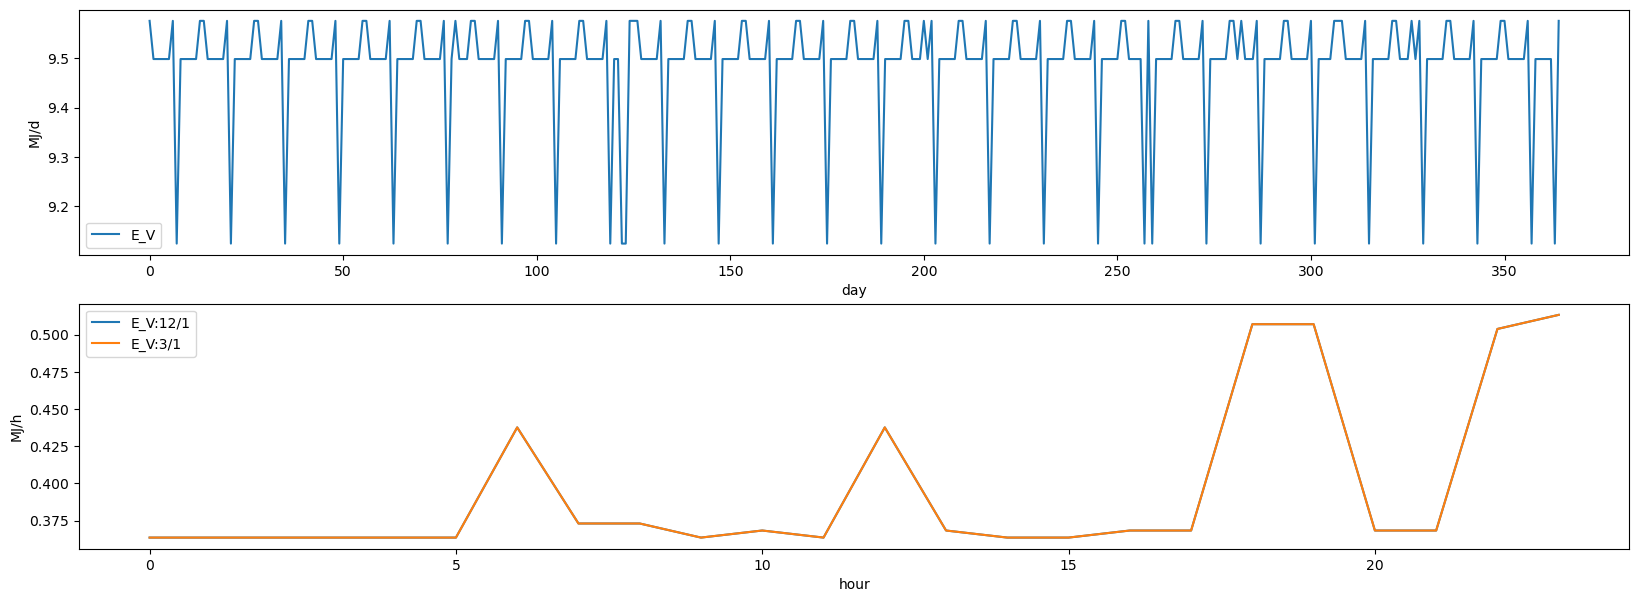

In [8]:
get_each_graph(E_V_d_t_2)

### 試算例3

- 省エネルギー手法として、径の太いダクトに変更

In [9]:
A_A, V, HEX = get_default_ventilation()
V['input'] = '省エネルギー手法'
V['duct'] = '内径 75mm 以上のダクトのみ使用'
V['current'] = '交流、又は直流と交流の併用'

E_V_d_t_3 = calc_results(A_A, V, HEX)

E_V_d_t = 3770.2099535744005MJ/a


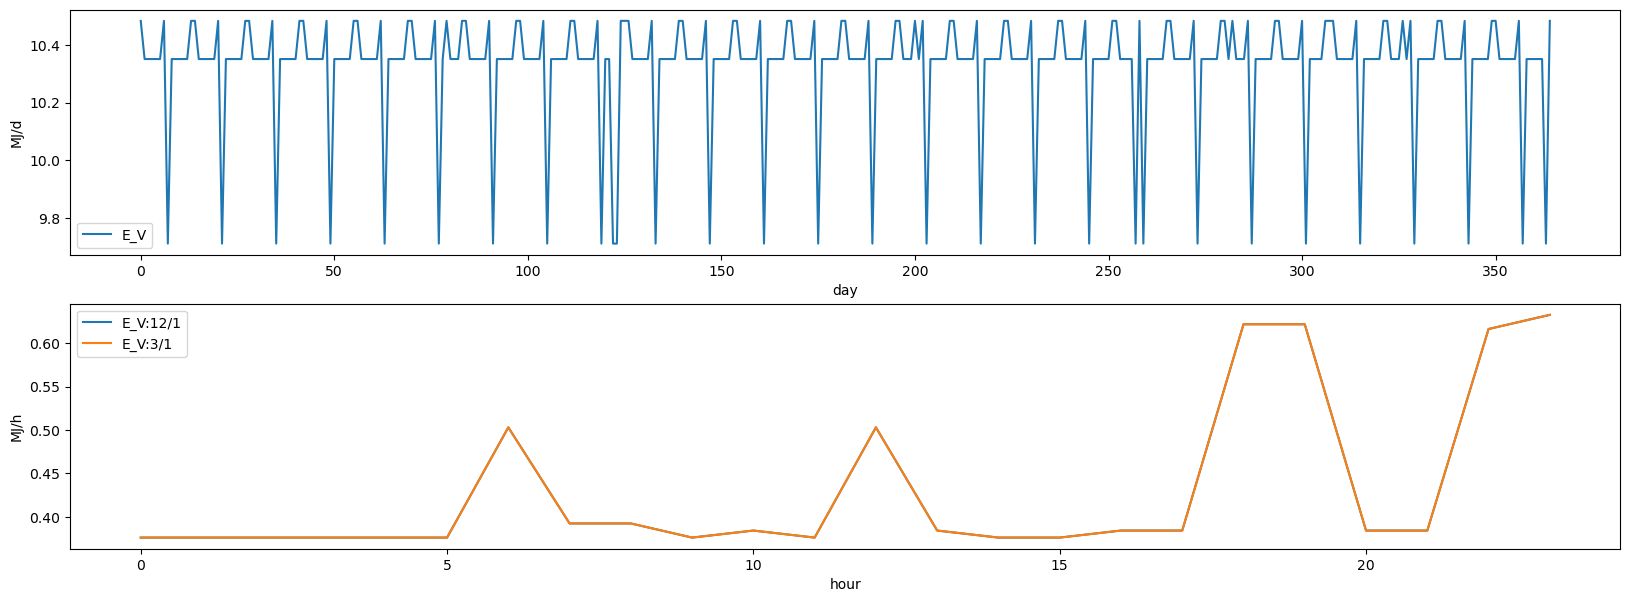

In [10]:
get_each_graph(E_V_d_t_3)

### 試算例4

- 省エネルギー手法として、径の太いダクトを使用し、かつDCモーターを採用するに変更

In [11]:
A_A, V, HEX = get_default_ventilation()
V['input'] = '省エネルギー手法'
V['duct'] = '内径 75mm 以上のダクトのみ使用'
V['current'] = '直流'

E_V_d_t_4 = calc_results(A_A, V, HEX)

E_V_d_t = 2469.2325084646404MJ/a


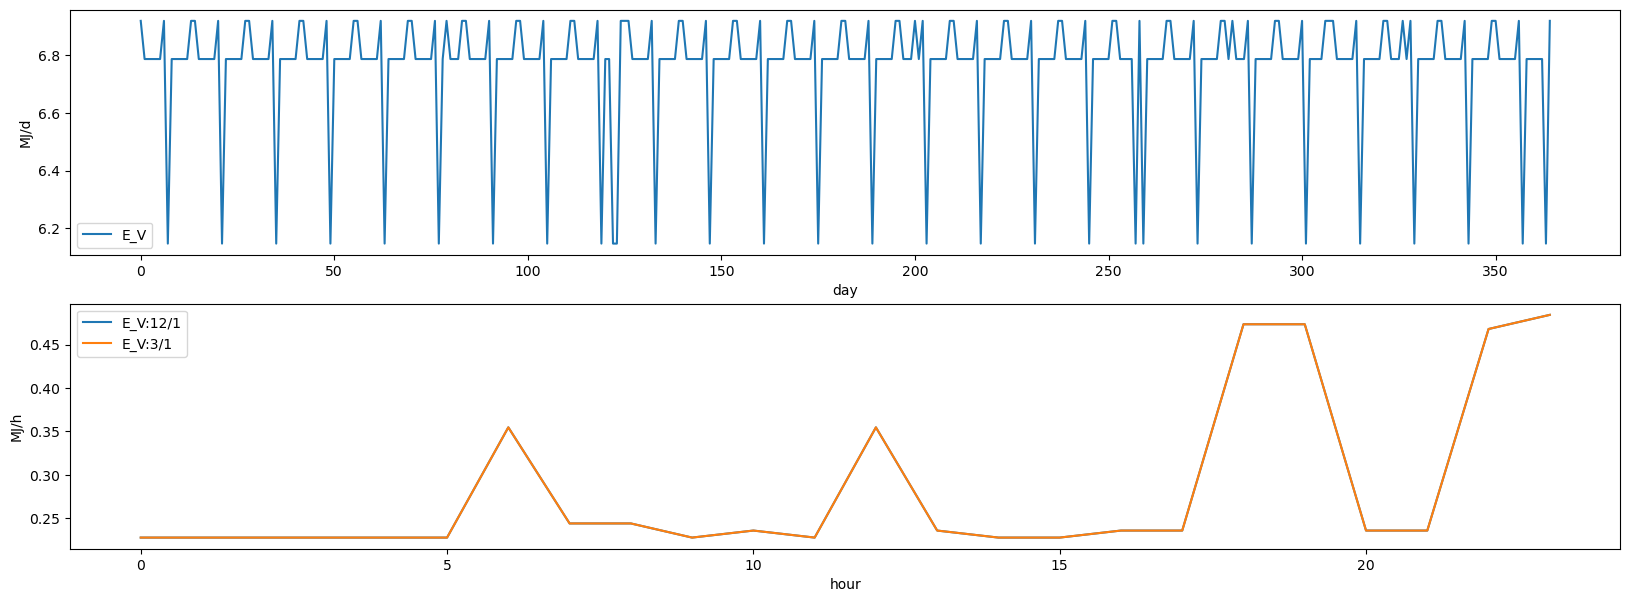

In [12]:
get_each_graph(E_V_d_t_4)

### 試算例5

- 比消費電力を0.30W/(m3/h)に変更

In [13]:
A_A, V, HEX = get_default_ventilation()
V['input'] = '比消費電力'
V['f_SFP'] = 0.30
E_V_d_t_5 = calc_results(A_A, V, HEX)

E_V_d_t = 4583.320856768MJ/a


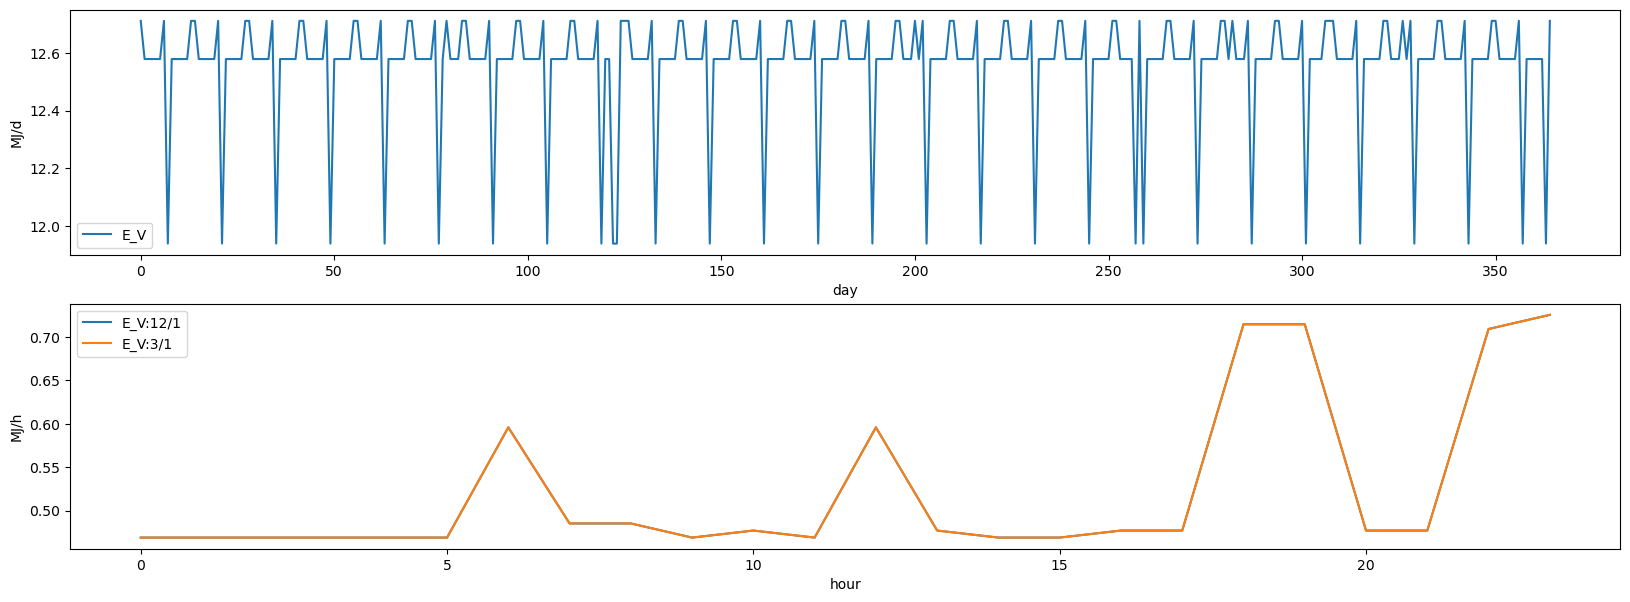

In [14]:
get_each_graph(E_V_d_t_5)

### 試算例6

- 有効換気量率を0.9に変更

In [15]:
A_A, V, HEX = get_default_ventilation()
V['type'] = 'ダクト式第一種換気設備'
V['v_e'] = 0.9
E_V_d_t_6 = calc_results(A_A, V, HEX)

E_V_d_t = 8046.571MJ/a


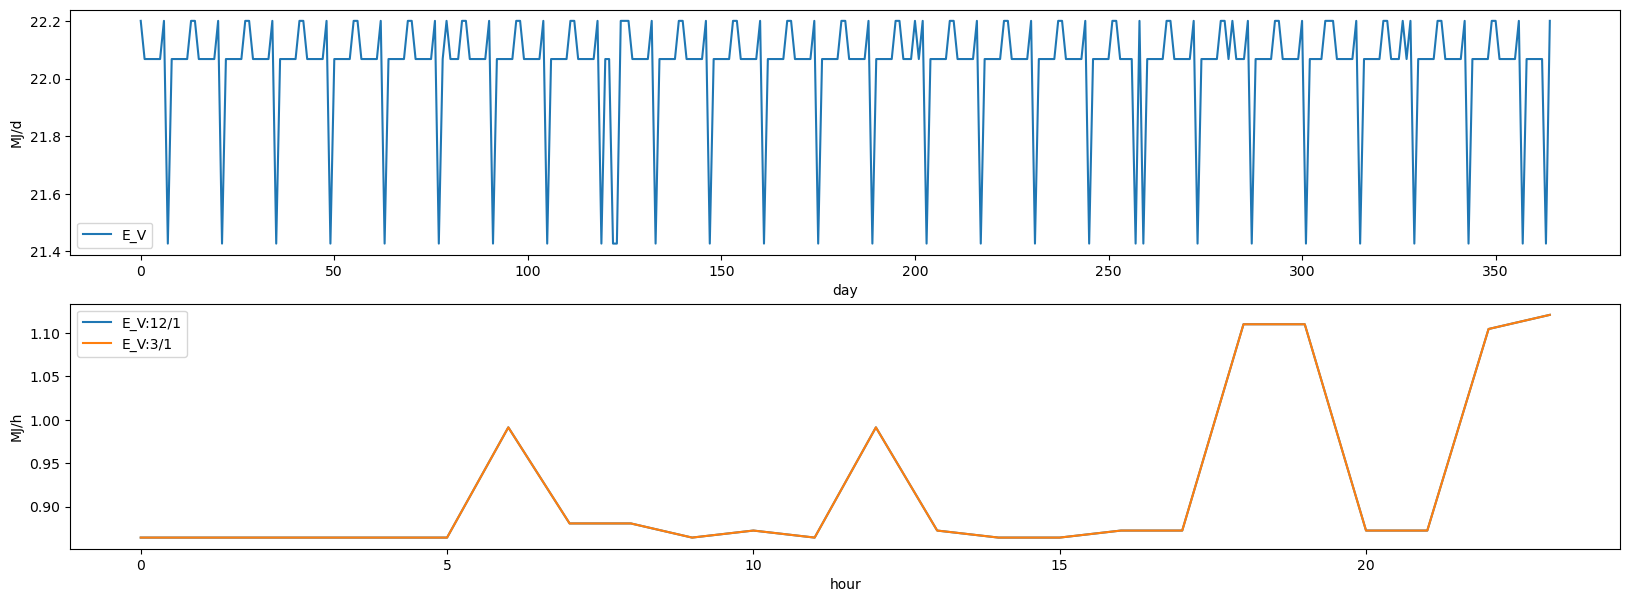

In [16]:
get_each_graph(E_V_d_t_6)

### 試算例7

- 換気回数0.7に変更

In [17]:
A_A, V, HEX = get_default_ventilation()
V['type'] = '壁付け式第二種換気設備又は壁付け式第三種換気設備'
V['N'] = 0.7
E_V_d_t_7 = calc_results(A_A, V, HEX)

E_V_d_t = 6209.542663155201MJ/a


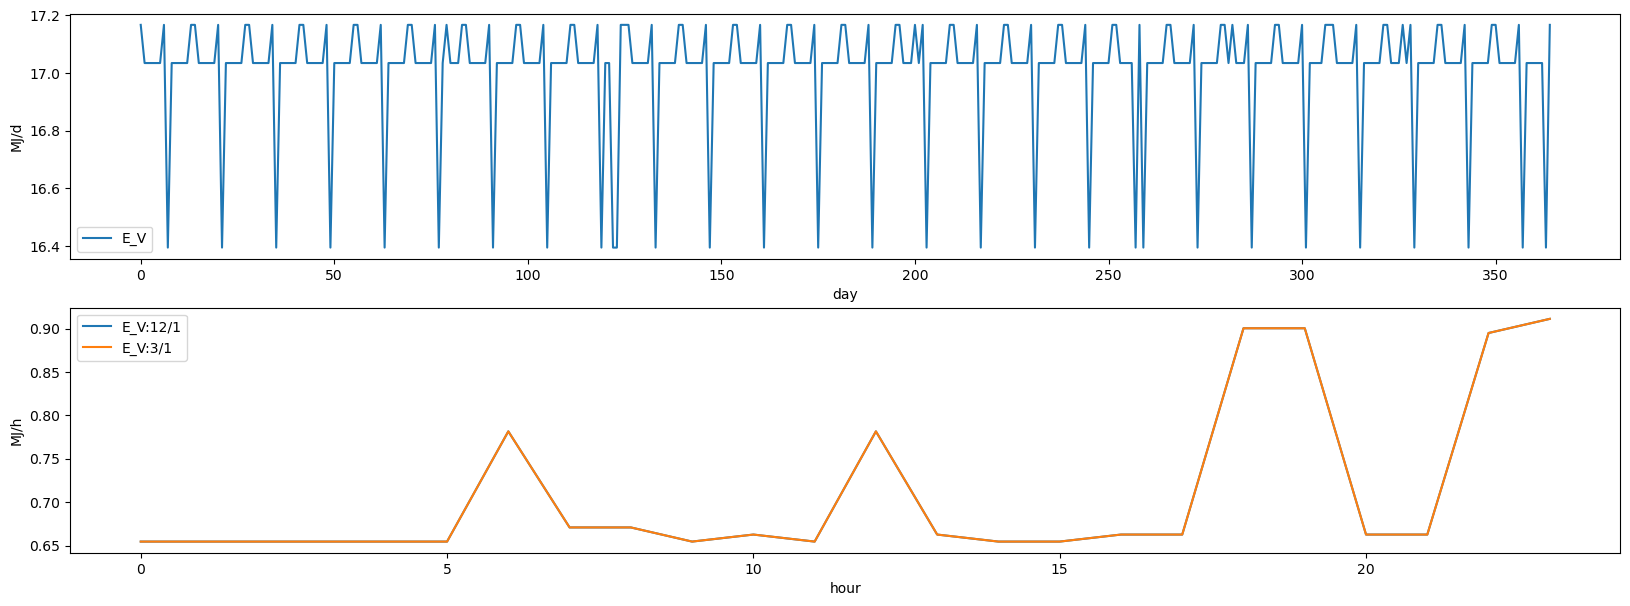

In [18]:
get_each_graph(E_V_d_t_7)

## 比較

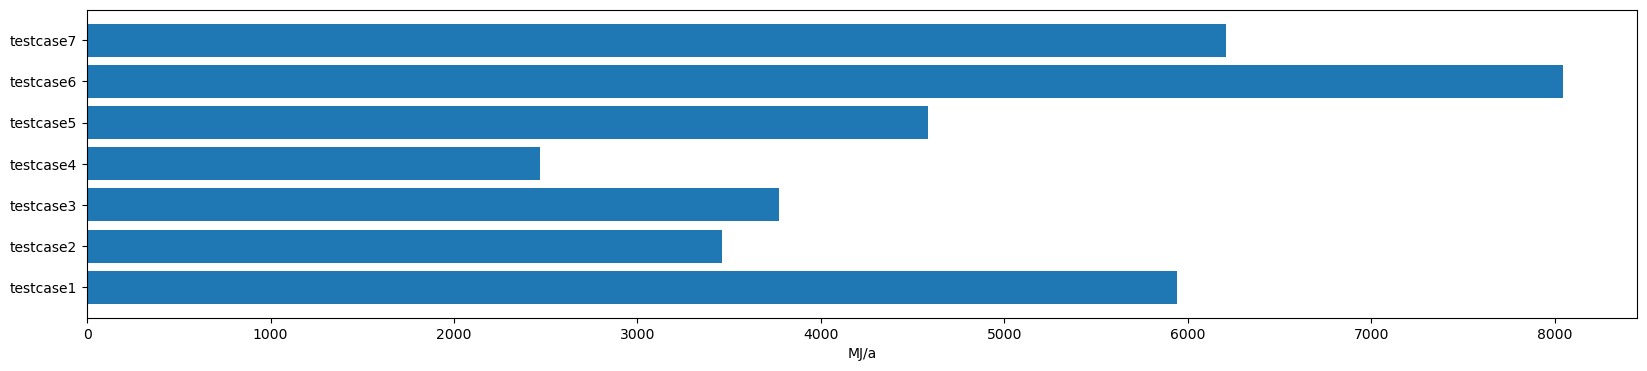

In [19]:
import matplotlib.pyplot as plt

dat = {"testcase1":sum(E_V_d_t_1),"testcase2" : sum(E_V_d_t_2), "testcase3" : sum(E_V_d_t_3), "testcase4" : sum(E_V_d_t_4),
      "testcase5" : sum(E_V_d_t_5), "testcase6" : sum(E_V_d_t_6), "testcase7" : sum(E_V_d_t_7)}
xx = list(dat.keys())
yy = list(dat.values())

fig = plt.figure(figsize=(20,4))
axt = fig.add_subplot(111)
axt.barh(xx,yy)
axt.set_xlabel("MJ/a")
plt.show()
